# Data-Processing

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
subscribers = pd.read_csv('subscribers.csv', parse_dates = ['account_creation_date', 'trial_end_date','last_payment','next_payment','cancel_date'])
subscribers.head()


,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:00,2020-06-07 21:44:00,NaT,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:00,2020-07-15 15:44:00,NaT,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaT,NaT,NaT,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:00,2020-06-19 12:57:00,NaT,True


In [9]:
#subscribers.info() 

In [10]:
subscribers.shape

(227628, 31)

In [5]:
#subscribers.isnull().sum()


In [6]:
#subscribers.describe() 

In [11]:
subscribers.rename(columns={
    'Unnamed: 0': 'serial_number', 
}, inplace=True)

subscribers.columns

Index(['serial_number', 'subid', 'package_type',
       'num_weekly_services_utilized', 'preferred_genre', 'intended_use',
       'weekly_consumption_hour', 'num_ideal_streaming_services', 'age',
       'male_TF', 'country', 'attribution_technical', 'attribution_survey',
       'op_sys', 'months_per_bill_period', 'plan_type', 'monthly_price',
       'discount_price', 'account_creation_date', 'trial_end_date',
       'initial_credit_card_declined', 'join_fee', 'language', 'payment_type',
       'num_trial_days', 'current_sub_TF', 'payment_period', 'last_payment',
       'next_payment', 'cancel_date', 'trial_completed'],
      dtype='object')

-------

# Customer Segmentation

In [12]:
customer_seg = subscribers.copy(deep=False)
customer_seg.head()

,serial_number,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:00,2020-06-07 21:44:00,NaT,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:00,2020-07-15 15:44:00,NaT,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaT,NaT,NaT,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaT,NaT,NaT,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:00,2020-06-19 12:57:00,NaT,True


In [13]:
#CusSeg_cols = customer_seg[['subid','package_type','num_weekly_services_utilized', 'preferred_genre','intended_use','weekly_consumption_hour','num_ideal_streaming_services','age','male_TF','attribution_technical','op_sys',]]  # notice the two layers of brackets

#CusSeg_cols.head()


### Missing Values

In [14]:
cusSeg_cols = customer_seg[['subid', 'package_type','num_weekly_services_utilized','preferred_genre',
                           'intended_use','weekly_consumption_hour','num_ideal_streaming_services',
                           'age','male_TF','attribution_technical','op_sys']] 

cusSeg_cols.head()


,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys
0,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,facebook,Android
1,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,facebook,NaN
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,iOS
3,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,search,Android
4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,iOS


In [15]:
cusSeg_cols.shape

(227628, 11)

In [16]:
cusSeg_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 11 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192459 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   attribution_technical         227628 non-null  object 
 10  op_sys                        214253 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 19.1+ MB


In [17]:
cusSeg_cols.isnull().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35169
male_TF                            269
attribution_technical                0
op_sys                           13375
dtype: int64

In [18]:
cusSeg_cols.describe() 

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05
mean,2.498624e+07,3.008824,27.997724,2.061260,7.579755e+02
std,2.885543e+06,0.820526,4.976341,0.245907,1.920204e+05
min,2.000001e+07,0.000000,-32.146760,-1.000000,0.000000e+00
25%,2.248998e+07,2.000000,24.401536,2.000000,3.500000e+01
50%,2.497011e+07,3.000000,27.301448,2.000000,4.600000e+01
75%,2.749020e+07,3.000000,30.201361,2.000000,5.700000e+01
max,2.999998e+07,14.000000,76.599962,7.000000,8.172000e+07


#### num_weekly_services_utilized

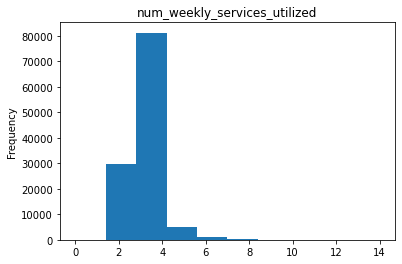

In [19]:
cusSeg_cols['num_weekly_services_utilized'].plot(kind='hist', title='num_weekly_services_utilized')


In [20]:
cusSeg_cols['num_weekly_services_utilized'].mode()

0    3.0
dtype: float64

In [21]:
cusSeg_cols['num_weekly_services_utilized'].mean()

3.0088241820136887

In [22]:
cusSeg_cols['num_weekly_services_utilized']=cusSeg_cols['num_weekly_services_utilized'].fillna(3)



<ipython-input-22-f8648148a8a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusSeg_cols['num_weekly_services_utilized']=cusSeg_cols['num_weekly_services_utilized'].fillna(3)


#### num_ideal_streaming_services

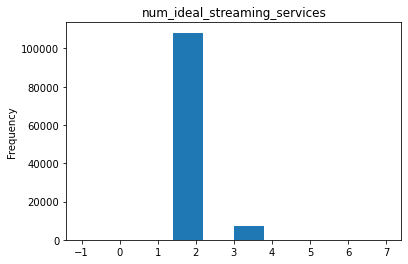

In [23]:
cusSeg_cols['num_ideal_streaming_services'].plot(kind='hist', title='num_ideal_streaming_services')


In [24]:
cusSeg_cols['num_ideal_streaming_services'].mode()


0    2.0
dtype: float64

In [25]:
cusSeg_cols['num_ideal_streaming_services']=cusSeg_cols['num_ideal_streaming_services'].fillna(3)


<ipython-input-25-40c55023df82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusSeg_cols['num_ideal_streaming_services']=cusSeg_cols['num_ideal_streaming_services'].fillna(3)


#### age

In [26]:
cusSeg_cols.shape

(227628, 11)

In [27]:
cusSeg_cols['age'].value_counts()

50.000000      6355
40.000000      5509
60.000000      5221
48.000000      4651
47.000000      4517
               ... 
1816.000000       1
34.426448         1
5204.000000       1
5193.000000       1
540.000000        1
Name: age, Length: 278, dtype: int64

In [28]:
cusSeg_cols = cusSeg_cols.drop(cusSeg_cols[cusSeg_cols['age'] >= 2010].index)
cusSeg_cols.shape

(227590, 11)

In [29]:
cusSeg_cols = cusSeg_cols.drop(cusSeg_cols[cusSeg_cols['age'] <= 10].index)
cusSeg_cols.shape

(227523, 11)

In [30]:
cusSeg_cols = cusSeg_cols.drop(cusSeg_cols[(cusSeg_cols['age'] >= 100) & (cusSeg_cols['age'] <= 1920)].index)
cusSeg_cols.shape


(227429, 11)

In [31]:
for i in cusSeg_cols['age']:
    if i <= 2010 and i >= 1920:
        cusSeg_cols.age[cusSeg_cols['age']== i] = 2020 - i
  

<ipython-input-31-c10ce81a63c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cusSeg_cols.age[cusSeg_cols['age']== i] = 2020 - i


In [32]:
cusSeg_cols['age'].describe()


count    192260.000000
mean         46.234134
std          13.978819
min          16.000000
25%          35.000000
50%          46.000000
75%          57.000000
max          99.000000
Name: age, dtype: float64

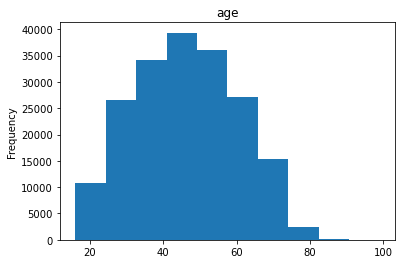

In [33]:
cusSeg_cols['age'].plot(kind='hist', title='age')


#### clean

In [67]:
CustomerS = cusSeg_cols.dropna()
CustomerS.shape

(144399, 11)

In [68]:
CustomerS.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age
count,1.443990e+05,144399.000000,144399.000000,144399.000000,144399.000000
mean,2.499649e+07,3.006898,28.059145,2.396118,45.600084
std,2.881830e+06,0.661192,4.933270,0.490985,13.833237
min,2.000001e+07,0.000000,-32.146760,0.000000,16.000000
25%,2.250063e+07,3.000000,24.401536,2.000000,35.000000
50%,2.498656e+07,3.000000,27.301448,2.000000,45.000000
75%,2.749846e+07,3.000000,30.201361,3.000000,56.000000
max,2.999998e+07,14.000000,76.599962,7.000000,99.000000


In [69]:
CustomerS = CustomerS.drop(CustomerS[(CustomerS['weekly_consumption_hour'] < 0)].index)



In [70]:
CustomerS.shape

(144383, 11)

In [38]:
#CustomerS.to_csv("CustomerS.csv")

### Dummy

In [71]:
CustomerS.head(2)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys
2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,iOS
3,29417030,base,3.0,drama,replace OTT,20.051667,3.0,30.0,False,search,Android


In [72]:
dummy_fields = ['package_type', 'preferred_genre','intended_use','male_TF','attribution_technical','op_sys']

for each in dummy_fields:
    dummies = pd.get_dummies( CustomerS.loc[:, each], prefix=each ) 
    CustomerS = pd.concat( [CustomerS, dummies], axis = 1 )
    
    
fields_to_drop = ['package_type', 'preferred_genre','intended_use','male_TF','attribution_technical','op_sys']
CustomerS1 = CustomerS.drop( fields_to_drop, axis = 1 )
CustomerS1.head()
    

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,package_type_enhanced,preferred_genre_comedy,preferred_genre_drama,...,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,attribution_technical_youtube,op_sys_Android,op_sys_iOS
2,26844789,3.0,36.001186,2.0,25.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,29417030,3.0,20.051667,3.0,30.0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,26723159,4.0,22.951579,3.0,28.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,29726122,2.0,20.051667,2.0,61.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,20299962,3.0,34.551230,2.0,23.0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [73]:
CustomerS1 = CustomerS1.drop('package_type_enhanced', 1)
CustomerS1 = CustomerS1.drop('preferred_genre_regional', 1)
CustomerS1 = CustomerS1.drop('intended_use_supplement OTT', 1)
CustomerS1 = CustomerS1.drop('male_TF_False', 1)
CustomerS1 = CustomerS1.drop('attribution_technical_youtube', 1)
CustomerS1 = CustomerS1.drop('op_sys_iOS', 1)
CustomerS1

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,...,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,op_sys_Android
2,26844789,3.0,36.001186,2.0,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29417030,3.0,20.051667,3.0,30.0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,26723159,4.0,22.951579,3.0,28.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,29726122,2.0,20.051667,2.0,61.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
7,20299962,3.0,34.551230,2.0,23.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,2.0,24.401536,2.0,43.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
227623,21434712,3.0,28.751405,2.0,38.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
227624,25843074,2.0,27.301448,2.0,49.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
227625,24799085,3.0,31.651317,3.0,45.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Standardization

In [42]:
CustomerS1['num_weekly_services_utilized'] = (CustomerS1['num_weekly_services_utilized']-CustomerS1['num_weekly_services_utilized'].mean())/(CustomerS1['num_weekly_services_utilized'].std())
CustomerS1['weekly_consumption_hour'] = (CustomerS1['weekly_consumption_hour']-CustomerS1['weekly_consumption_hour'].mean())/(CustomerS1['weekly_consumption_hour'].std())
CustomerS1['num_ideal_streaming_services'] = (CustomerS1['num_ideal_streaming_services']-CustomerS1['num_ideal_streaming_services'].mean())/(CustomerS1['num_ideal_streaming_services'].std())
CustomerS1['age'] = (CustomerS1['age']-CustomerS1['age'].mean())/(CustomerS1['age'].std())
#CustomerS1


In [43]:
#CustomerS1.to_csv("CustomerS1.csv")

## Clustering

In [44]:
from sklearn.cluster import KMeans
feature_x = [tag for tag in CustomerS1.columns if tag not in ['subid']]
X = CustomerS1[feature_x].values

inertias = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X) 
    inertias[k] = kmeans.inertia_
print(inertias) 


{2: 790397.5816951859, 3: 709154.0251270531, 4: 659698.5365259205, 5: 617419.7786348725, 6: 577911.2005967903, 7: 546654.6511038532, 8: 526724.7202806118, 9: 511017.78276761196, 10: 500712.1446957645, 11: 491611.47318818024, 12: 481201.6492918704, 13: 472879.52573660866, 14: 465212.5660498304, 15: 458237.2683446829, 16: 452483.103520189, 17: 447080.66223110666, 18: 442079.21350712795, 19: 435767.4907714898}


In [45]:
kmeans.transform(X).shape

(144383, 19)

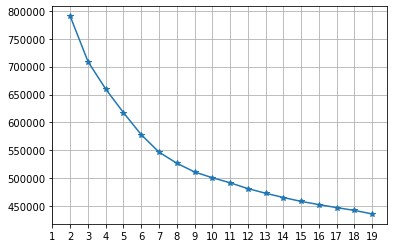

In [46]:
ax = plt.subplot()
k=list(inertias.keys())
v=list(inertias.values())
ax.plot(k,v, '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [48]:
from sklearn.metrics import silhouette_score

#feature_x = [tag for tag in CustomerS1.columns if tag not in ['subid']]
#X = CustomerS1[feature_x].values

#scores = {}
#for k in range(2, 20):
#    kmeans = KMeans(n_clusters=k, random_state=2020)
#    kmeans.fit(X)
#    score = silhouette_score(X, kmeans.labels_)
#    scores[k] = score
#print(scores)  


In [47]:
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=2020)
y_pred = kmeans.fit_predict(X)

In [48]:
def visualize_cluster_result(x, dim1, dim2, y_pred, k):
    # select two feature dims: dim1, dim2, visualize the clusters
    assert dim1 in range(x.shape[1])
    assert dim2 in range(x.shape[1])
    ax = plt.subplot()
    # use a for loop to plot each cluster (with different colors)
    for i in range(k):
        ax.scatter(x[y_pred == i, dim1], x[y_pred ==  i, dim2], label='cluster: %d' % i)
    plt.title('Visualization of clustering of dim %d and dim %d' % (dim1, dim2))
    ax.set_xlabel('dim: %d' % dim1)
    ax.set_ylabel('dim: %d' % dim2)
    ax.legend()
    plt.show()

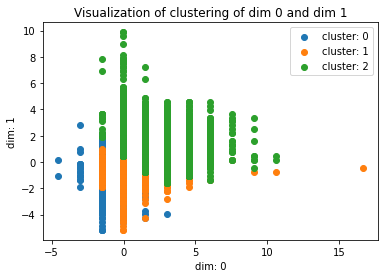

In [49]:
visualize_cluster_result(X, 0, 1, y_pred, k)

In [74]:
CustomerS2=pd.DataFrame(CustomerS1)
CustomerS2['Clustering'] =y_pred


In [75]:
CustomerS2

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,preferred_genre_comedy,preferred_genre_drama,preferred_genre_international,...,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,op_sys_Android,Clustering
2,26844789,3.0,36.001186,2.0,25.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,29417030,3.0,20.051667,3.0,30.0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
4,26723159,4.0,22.951579,3.0,28.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
6,29726122,2.0,20.051667,2.0,61.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,20299962,3.0,34.551230,2.0,23.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227622,25835684,2.0,24.401536,2.0,43.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
227623,21434712,3.0,28.751405,2.0,38.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
227624,25843074,2.0,27.301448,2.0,49.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
227625,24799085,3.0,31.651317,3.0,45.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
CustomerS2['Clustering'].value_counts()


0    64006
1    50205
2    30172
Name: Clustering, dtype: int64

In [77]:
#CustomerS2.to_csv("CustomerS2_dummy.csv")

#### MinMax Clustering

In [56]:
CustomerS3 = CustomerS.drop( fields_to_drop, axis = 1 )

In [57]:
CustomerS3.shape

(144383, 56)

In [60]:
#CustomerS3 = CustomerS3.drop('package_type_enhanced', 1)
#CustomerS3 = CustomerS3.drop('preferred_genre_regional', 1)
#CustomerS3 = CustomerS3.drop('intended_use_supplement OTT', 1)
#CustomerS3 = CustomerS3.drop('male_TF_False', 1)
#CustomerS3 = CustomerS3.drop('attribution_technical_youtube', 1)
#CustomerS3 = CustomerS3.drop('op_sys_iOS', 1)
#CustomerS3

In [61]:
feature_x = [tag for tag in CustomerS3.columns if tag not in ['subid']]
X = CustomerS3[feature_x].values

from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X_scaled = minmaxscaler.fit_transform(X)



In [62]:
from sklearn.cluster import KMeans

inertias = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=2020)
    kmeans.fit(X_scaled)
    inertias[k] = kmeans.inertia_
print(inertias) 

{2: 316839.83909417776, 3: 283540.6996796263, 4: 266790.9228795487, 5: 253289.58451648976, 6: 242605.10409120948, 7: 234256.72359294185, 8: 226524.68149611467, 9: 222724.18534495457, 10: 214404.82519131503, 11: 211196.6774404477, 12: 207767.0009927502, 13: 203595.0435988134, 14: 201429.18092098102, 15: 197110.73242109202, 16: 194584.37001912043, 17: 190472.23834454277, 18: 187251.80539744, 19: 185360.57325114432}


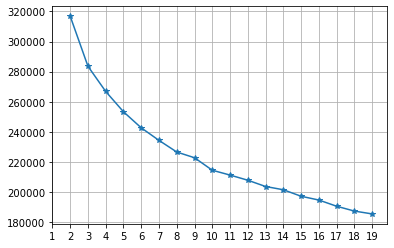

In [64]:
ax = plt.subplot()
k=list(inertias.keys())
v=list(inertias.values())
ax.plot(k,v, '-*')
ax.set_xticks(np.arange(1, 20))
ax.grid()
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
CustomerS2_2 = pd.read_csv('CustomerS2_2.csv')
CustomerS2_2.head()


,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,attribution_technical,op_sys,Clustering
0,2,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,organic,iOS,2
1,3,29417030,base,3.0,drama,replace OTT,20.051667,3.0,30.0,False,search,Android,1
2,4,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,discovery,iOS,1
3,6,29726122,base,2.0,comedy,access to exclusive content,20.051667,2.0,61.0,False,bing,Android,0
4,7,20299962,base,3.0,drama,access to exclusive content,34.551230,2.0,23.0,False,email,iOS,2


In [84]:
CustomerS2_dummy = pd.read_csv('CustomerS2_dummy.csv')
CustomerS2_dummy.head()


,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,preferred_genre_comedy,preferred_genre_drama,...,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,op_sys_Android,Clustering
0,2,26844789,3.0,36.001186,2.0,25.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,3,29417030,3.0,20.051667,3.0,30.0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
2,4,26723159,4.0,22.951579,3.0,28.0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,6,29726122,2.0,20.051667,2.0,61.0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,7,20299962,3.0,34.551230,2.0,23.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [83]:
CustomerS2_2.groupby('Clustering').mean()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF
Clustering,,,,,,,
0,113741.006031,2.499801e+07,2.656595,26.040419,1.999016,45.498275,0.018764
1,113701.684314,2.499467e+07,3.064715,27.081551,3.000299,45.875789,0.076765
2,114400.686862,2.499638e+07,3.653851,33.990364,2.233296,45.356291,0.478788


In [85]:
CustomerS2_dummy.groupby('Clustering').mean()

,Unnamed: 0,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,package_type_base,package_type_economy,preferred_genre_comedy,preferred_genre_drama,...,attribution_technical_pinterest_organic,attribution_technical_playstore,attribution_technical_podcast,attribution_technical_quora,attribution_technical_referral,attribution_technical_samsung,attribution_technical_search,attribution_technical_tv,attribution_technical_vod,op_sys_Android
Clustering,,,,,,,,,,,,,,,,,,,,,
0,113741.006031,2.499801e+07,2.656595,26.040419,1.999016,45.498275,0.564713,0.092632,0.685717,0.203731,...,0.000172,0.000047,0.005593,0.000641,0.026716,0.000031,0.120786,0.000016,0.001625,0.319329
1,113701.684314,2.499467e+07,3.064715,27.081551,3.000299,45.875789,0.551897,0.092959,0.639558,0.260611,...,0.000239,0.000040,0.004860,0.000578,0.011792,0.000020,0.141659,0.000040,0.002151,0.375122
2,114400.686862,2.499638e+07,3.653851,33.990364,2.233296,45.356291,0.542490,0.109936,0.505535,0.331930,...,0.000099,0.000133,0.008418,0.000729,0.029730,0.000033,0.139765,0.000033,0.002022,0.379259


In [91]:
ChurnData6 = pd.read_csv('ChurnData6.csv')

In [113]:
CustomerS4 = pd.merge(ChurnData6, CustomerS2_2, on='subid', how='left')

In [114]:
CustomerS4.groupby('Clustering').count()

,Unnamed: 0_x,subid,join_fee,churn,initial_credit_card_declined_False,Unnamed: 0.1,num_weekly_services_utilized_x,weekly_consumption_hour_x,num_ideal_streaming_services_x,age_x,...,package_type,num_weekly_services_utilized_y,preferred_genre,intended_use,weekly_consumption_hour_y,num_ideal_streaming_services_y,age_y,male_TF,attribution_technical,op_sys
Clustering,,,,,,,,,,,,,,,,,,,,,
0,60991,60991,60991,60991,60991,60991,60991,60991,60991,60991,...,60991,60991,60991,60991,60991,60991,60991,60991,60991,60991
1,47930,47930,47930,47930,47930,47930,47930,47930,47930,47930,...,47930,47930,47930,47930,47930,47930,47930,47930,47930,47930
2,28417,28417,28417,28417,28417,28417,28417,28417,28417,28417,...,28417,28417,28417,28417,28417,28417,28417,28417,28417,28417


In [139]:
Cluster0 = CustomerS4[CustomerS4['Clustering']==0]

In [126]:
Cluster0.to_csv("Cluster0.csv")

In [140]:
Cluster0['churn'].value_counts()

0    37782
1    23209
Name: churn, dtype: int64

In [141]:
Cluster1 = CustomerS4[CustomerS4['Clustering']==1]

In [142]:
Cluster1['churn'].value_counts()

0    32503
1    15427
Name: churn, dtype: int64

In [143]:
Cluster2 = CustomerS4[CustomerS4['Clustering']==2]

In [144]:
Cluster2['churn'].value_counts()

0    21413
1     7004
Name: churn, dtype: int64

In [186]:
Cluster1['intended_use'].value_counts()

access to exclusive content    20991
replace OTT                    17995
supplement OTT                  7337
other                           1509
expand regional access            44
expand international access       41
education                         13
Name: intended_use, dtype: int64

In [124]:
Cluster1['age_y'].describe()

count    47930.000000
mean        45.890507
std         14.524095
min         16.000000
25%         34.000000
50%         46.000000
75%         57.000000
max         99.000000
Name: age_y, dtype: float64

In [125]:
Cluster2['age_y'].describe()

count    47930.000000
mean        45.890507
std         14.524095
min         16.000000
25%         34.000000
50%         46.000000
75%         57.000000
max         99.000000
Name: age_y, dtype: float64

In [146]:
Cluster2['male_TF'].value_counts()

False    14943
True     13474
Name: male_TF, dtype: int64

In [149]:
Cluster2['op_sys'].value_counts()

iOS        17640
Android    10777
Name: op_sys, dtype: int64

In [155]:
Cluster1['num_ideal_streaming_services_y'].describe()

count    47930.000000
mean         3.000313
std          0.026238
min          3.000000
25%          3.000000
50%          3.000000
75%          3.000000
max          7.000000
Name: num_ideal_streaming_services_y, dtype: float64

In [173]:
Cluster2['preferred_genre'].value_counts()

comedy           14321
drama             9454
regional          2002
international     1693
other              947
Name: preferred_genre, dtype: int64

In [ ]:
package_type

In [174]:
Cluster2['package_type'].value_counts()

base        15396
enhanced     9898
economy      3123
Name: package_type, dtype: int64

In [177]:
Cluster2['weekly_consumption_hour_y'].describe()

count    28417.000000
mean        33.963124
std          4.590962
min         20.051667
25%         31.651317
50%         33.101274
75%         37.451142
max         76.599962
Name: weekly_consumption_hour_y, dtype: float64

In [ ]:
weekly_consumption_hour_y